In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (12,12)

In [2]:
# def crop(img, ax0_min, ax0_max, ax1_min, ax1_max):
#     ax0_size = ax0_max - ax0_min
#     ax1_size = ax1_max - ax1_min
#     ax0_start = int(max(0, ax0_min - ax0_size*2))
#     ax1_start = int(max(0, ax1_min - ax1_size*2))
#     cropped = img[ax0_start: ax0_start + ax0_size *
#                   5, ax1_start: ax1_start + ax1_size*5]

In [3]:
filename = '../csv_detection_info/19_3, OCD.csv'
filename_clean = '../csv_detection_info_clean/19_3, OCD.csv'
saved_cropped_image = '//nmbu.no/LargeFile/Project/CubiAI/preprocess/cropped/19/3, OCD'

In [4]:
detection_df = pd.read_csv(filename)

In [5]:
detection_df

,base_path,filename,ax0_min,ax0_max,ax1_min,ax1_max,confidence,year,diagnosis,diagnosis_raw
0,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.2.276.0.82.1.1.1430.87290889.192.168.0.112.6...,759,958,1408,1606,0.998058,19,3,"3, OCD"
1,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.2.276.0.82.1.1.1430.87290889.192.168.0.112.6...,747,948,1444,1647,0.977926,19,3,"3, OCD"
2,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.2.276.0.82.1.1.1430.87290889.192.168.0.112.6...,838,1038,1480,1681,0.953486,19,3,"3, OCD"
3,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.2.276.0.82.1.1.1430.87290889.192.168.0.112.6...,690,888,1390,1589,0.999228,19,3,"3, OCD"
4,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.2.392.200036.9125.9.0.487527015.39393792.383...,327,519,812,1005,0.985506,19,3,"3, OCD"
5,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.2.392.200036.9125.9.0.487528295.138877440.38...,498,691,776,970,0.999810,19,3,"3, OCD"
6,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.2.826.0.1.3680043.2.876.6339.1.2.3.201910101...,1024,1184,618,778,0.999996,19,3,"3, OCD"
7,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.3.51.0.7.13570051037.24404.35656.34044.17607...,511,656,854,999,0.999995,19,3,"3, OCD"
8,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.3.51.0.7.1652700352.15192.54351.44734.45664....,287,427,586,726,0.999999,19,3,"3, OCD"


### [Optional] Sort by confidence (filter out bad prediction)

In [6]:
# detection_df = detection_df[detection_df.confidence > 0.5]

In [7]:
detection_df[detection_df.confidence < 0.5].index

Int64Index([], dtype='int64')

Note that there is one case that is not good

### Look at the crop images

Are they reasonable, if not, mark the "weird", "wrong detected" image indice before saving it back to the clean folder

In [8]:
# plot every 9 of them

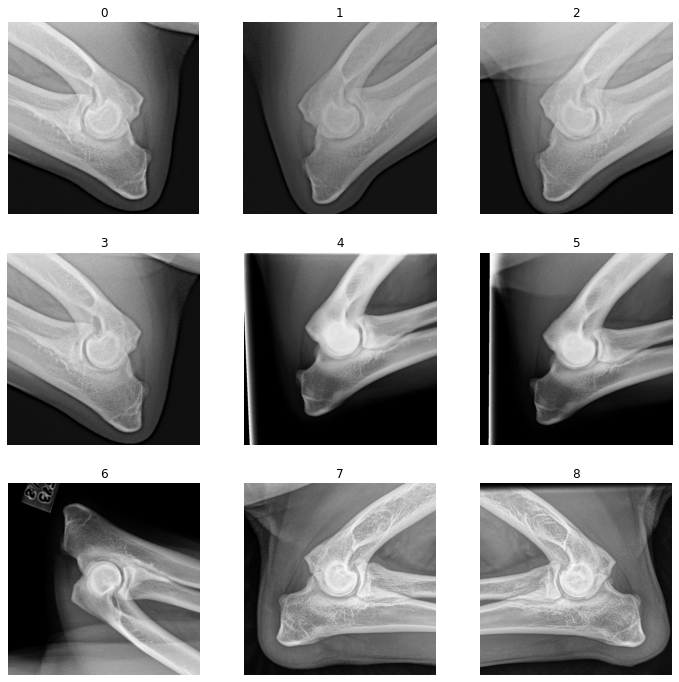

In [9]:
for id, item in detection_df.iterrows():
    fn = item['filename']
    img = np.load(saved_cropped_image + '/' + fn + '.npy')
    plt.subplot(3,3, (id%9) + 1)
    plt.imshow(img, 'gray')
    plt.axis('off')
    plt.title(str(id))
    
    if (id%9) == 8:
        plt.show()
        
plt.show()

## Remove bad detection items

In [10]:
detection_df.to_csv(filename_clean, index=False)